# Homework 2

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

In [1]:
# Q1
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

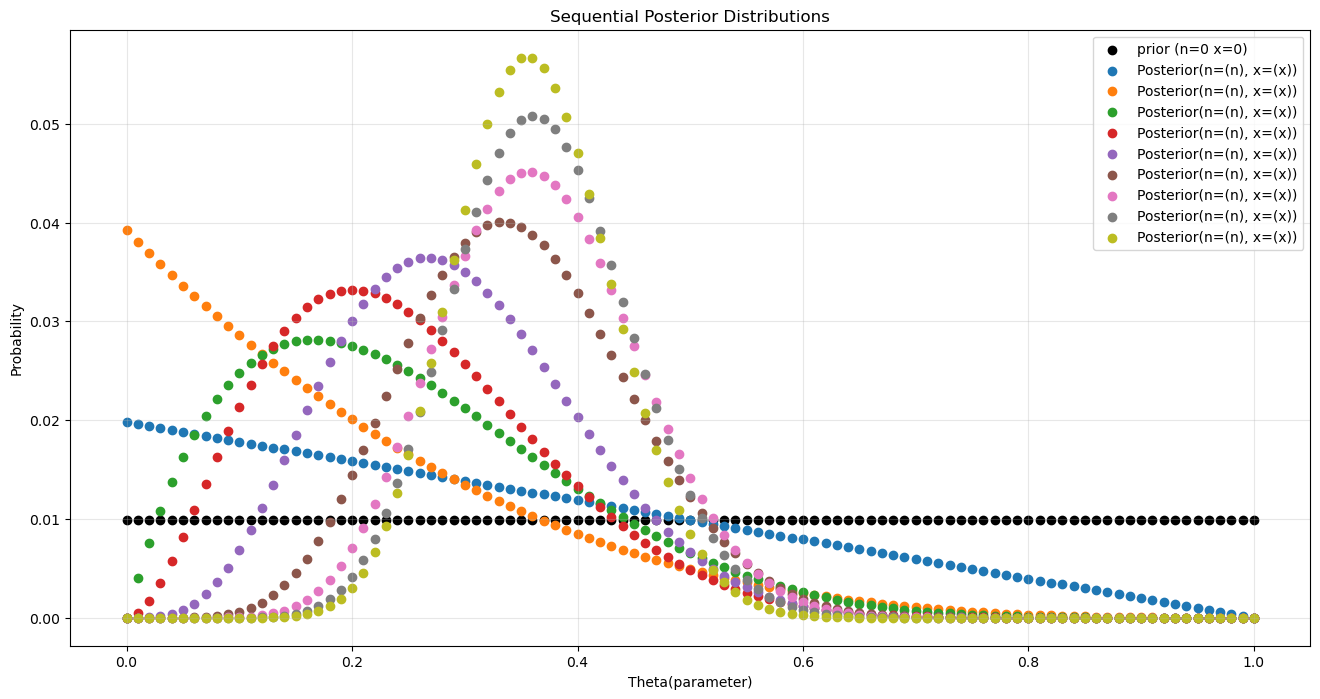

In [2]:
parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')

for observation in observations:
    n += 1
    x += observation
    
    
    # use these for batch updates based on a binomial distribution
    likelihood = parameter_domain ** x * (1 - parameter_domain) ** (n-x)
    
    # prior = posterior  # for each Bernoulli observation update
    posterior = likelihood * prior
    posterior /= posterior.sum()  # Normalize
    
    # Plot updated posterior
    plt.scatter(parameter_domain, posterior, label=f"Posterior(n=(n), x=(x))")
    
    # Update prior for the next observation
    prior = posterior

# Add legend and labels
plt.title("Sequential Posterior Distributions")
plt.xlabel("Theta(parameter)")
plt.ylabel("Probability")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

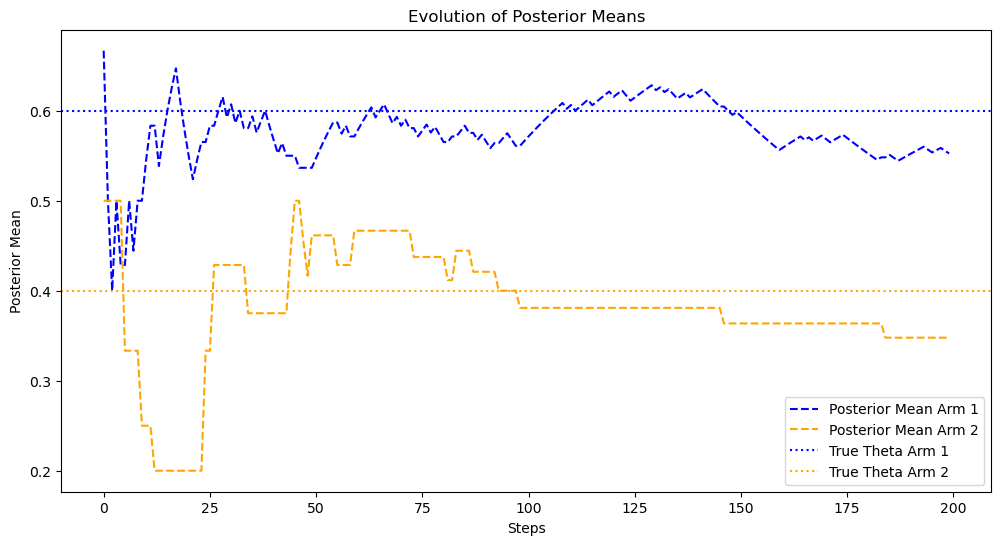

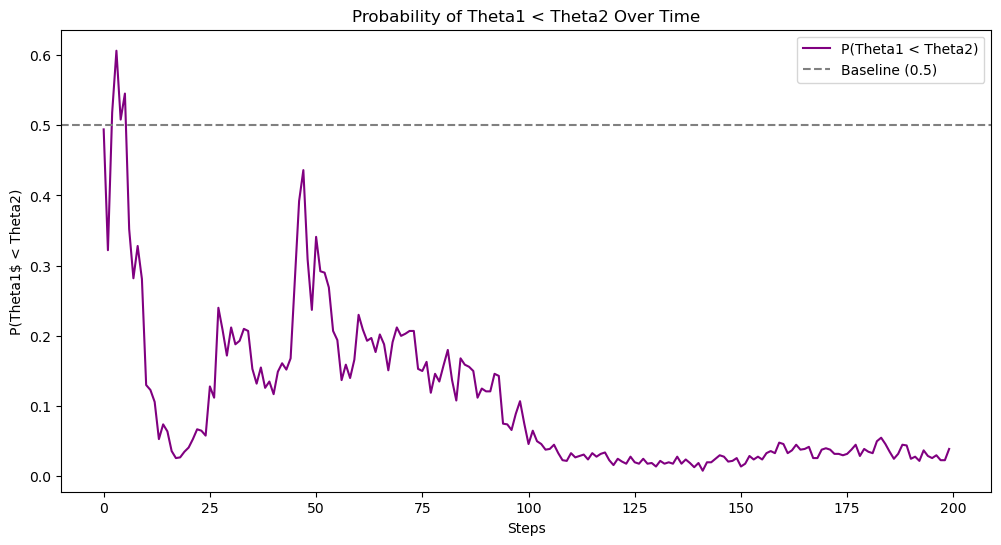

In [3]:
# Q2
# True success probabilities for two arms
theta1_true = 0.6
theta2_true = 0.4

# Initialize Beta distribution parameters for two arms
alpha1, beta1 = 1, 1  # Arm 1
alpha2, beta2 = 1, 1  # Arm 2

# Number of iterations
num_steps = 200
sample_size = 1000

# Records to store results
posterior_means_1 = []
posterior_means_2 = []
prob_theta1_less_theta2 = []

# Thompson Sampling Simulation
for t in range(num_steps):
    # Sample from the Beta distributions for both arms
    theta1_sample = np.random.beta(alpha1, beta1)
    theta2_sample = np.random.beta(alpha2, beta2)

    # Calculate the probability that theta1 < theta2
    prob = np.random.beta(alpha1, beta1, size=sample_size) < np.random.beta(alpha2, beta2, size=sample_size)
    prob_theta1_less_theta2.append(np.mean(prob))

    # Choose the arm with the higher sampled prob
    chosen_arm = 1 if theta1_sample > theta2_sample else 2

    # Simulate pulling the chosen arm
    if chosen_arm == 1:
        reward = np.random.binomial(1, theta1_true)
        alpha1 += reward
        beta1 += 1 - reward
    else:
        reward = np.random.binomial(1, theta2_true)
        alpha2 += reward
        beta2 += 1 - reward

    # Record the updated posterior means
    posterior_means_1.append(alpha1 / (alpha1 + beta1))
    posterior_means_2.append(alpha2 / (alpha2 + beta2))

# Plot the evolution of posterior means
plt.figure(figsize=(12, 6))
plt.plot(posterior_means_1, label="Posterior Mean Arm 1", linestyle='--', color='blue')
plt.plot(posterior_means_2, label="Posterior Mean Arm 2", linestyle='--', color='orange')
plt.axhline(theta1_true, color='blue', linestyle=':', label="True Theta Arm 1")
plt.axhline(theta2_true, color='orange', linestyle=':', label="True Theta Arm 2")
plt.title("Evolution of Posterior Means")
plt.xlabel("Steps")
plt.ylabel("Posterior Mean")
plt.legend()
plt.show()

# Plot the probability that theta1 < theta2
plt.figure(figsize=(12, 6))
plt.plot(prob_theta1_less_theta2, label="P(Theta1 < Theta2)", color='purple')
plt.axhline(0.5, color='gray', linestyle='--', label="Baseline (0.5)")
plt.title("Probability of Theta1 < Theta2 Over Time")
plt.xlabel("Steps")
plt.ylabel("P(Theta1$ < Theta2)")
plt.legend()
plt.show()




The posterior means for both arms (blue for Arm 1 and orange for Arm 2) converge toward their true success probabilities ($\theta_1$ = 0.6 and $\theta_2$ = 0.4) as more observations are collected.
The second plot shows estimated probability of $\theta_1$ < $\theta_2$ over time. It starts near 0.5 (uninformative prior) and decreases as the algorithm learns that $\theta_1$ is greater than $\theta_2$.


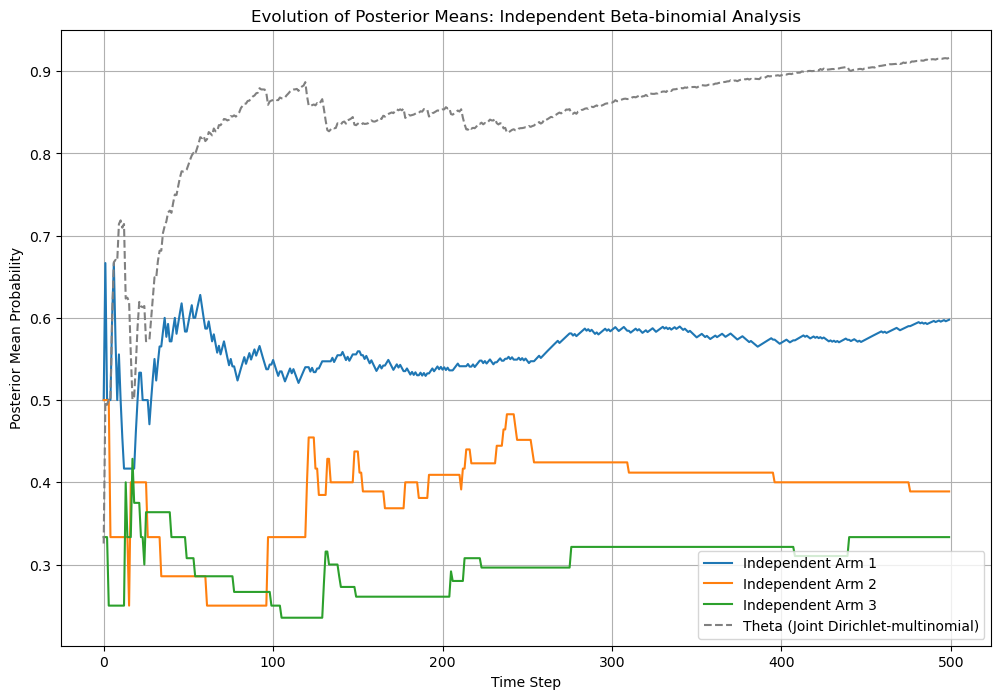

Final Posterior Mean Estimates: Independent Beta-binomial
Theta1: 0.598
Theta2: 0.389
Theta3: 0.333

Final Posterior Mean for Joint Dirichlet-multinomial: 0.916


In [4]:
# Q3
# True probabilities for three arms
theta_true = [0.6, 0.4, 0.3]

# Prior parameters for Beta distributions (Independent Analysis)
alpha_prior = [1, 1, 1]  # Alpha parameters for entities
beta_prior = [1, 1, 1]   # Beta parameters for entities

# Counters for successes and trials for each entity
n = [0, 0, 0]  # Total trials for each entity
x = [0, 0, 0]  # Successes for each entity

# Number of iterations and simulation settings
num_samples = 2000  # Monte Carlo samples for probability estimation
num_iterations = 500  # Total simulation iterations
epsilon = 1e-6  # Small positive constant for Dirichlet stability

# Storage for posterior means
posterior_means_independent = [[] for _ in range(3)]
posterior_means_joint = []

#1. Bayesian Multi-Armed Bandit Algorithm
for t in range(num_iterations):
    # Independent Beta-binomial model
    sampled_thetas = [np.random.beta(alpha_prior[i] + x[i], beta_prior[i] + n[i] - x[i], size=num_samples)
        for i in range(3)]

    # Compute the probability
    prob_theta1 = np.mean((sampled_thetas[0] > sampled_thetas[1]) & (sampled_thetas[0] > sampled_thetas[2]))

    # Decide which entity to sample based on probabilities
    if np.random.rand() < prob_theta1:
        sample_choose = 0
    elif np.random.rand() < np.mean(sampled_thetas[1] > sampled_thetas[2]):
        sample_choose = 1
    else:
        sample_choose = 2

    # Simulate success or failure for the chosen entity
    success = np.random.rand() < theta_true[sample_choose]
    n[sample_choose] += 1
    x[sample_choose] += success

    # Update posterior means for independent analysis
    for i in range(3):
        posterior_mean = (alpha_prior[i] + x[i]) / (alpha_prior[i] + beta_prior[i] + n[i])
        posterior_means_independent[i].append(posterior_mean)

    #2. Joint Dirichlet-multinomial model
    dirichlet_alpha = [alpha_prior[i] + x[i] + epsilon for i in range(3)]
    dirichlet_posterior = np.random.dirichlet(dirichlet_alpha, size=num_samples)

    # Compute the probability that Entity 1 is the best
    prob_theta1_joint = np.mean(
        (dirichlet_posterior[:, 0] > dirichlet_posterior[:, 1]) &
        (dirichlet_posterior[:, 0] > dirichlet_posterior[:, 2])
    )

    # Update Dirichlet posterior means
    posterior_means_joint.append(np.mean(dirichlet_posterior[:, 0]))

# Plot the evolution of posterior means for independent analysis
plt.figure(figsize=(12, 8))
for i in range(3):
    plt.plot(posterior_means_independent[i], label=f"Independent Arm {i + 1}")

# Plot posterior means for Joint Dirichlet-multinomial analysis
plt.plot(posterior_means_joint, color="gray", linestyle="--", label="Theta (Joint Dirichlet-multinomial)")

plt.title("Evolution of Posterior Means: Independent Beta-binomial Analysis")
plt.xlabel("Time Step")
plt.ylabel("Posterior Mean Probability")
plt.legend()
plt.grid()
plt.show()

# Print final posterior mean estimates
print("Final Posterior Mean Estimates: Independent Beta-binomial")
for i in range(3):
    final_mean = (alpha_prior[i] + x[i]) / (alpha_prior[i] + beta_prior[i] + n[i])
    print(f"Theta{i + 1}: {final_mean:.3f}")

# Print Final Posterior Mean for Joint Dirichlet-multinomial
print(f"\nFinal Posterior Mean for Joint Dirichlet-multinomial: {posterior_means_joint[-1]:.3f}")


Analysis 1: Independent Beta-binomial Model
Each entity in this model is analyzed in isolation and no information is shared between them. Theta1 converges closely to the true probability (0.6) as it dominates in performance. Theta2 and Theta3 converge slower due to under-sampling as the algorithm focuses on the best-performing arm.

Analysis 2: Joint Dirichlet-multinomial Model
This model uses shared information across all entities, which leads to faster convergence for the best arm.
Posterior mean probability for the best-performing Theta1 increases more aggressively compared to the independent model, as shown by the final mean of 0.916.

##### Actual real world AB testing:

Scenario:A mobile app sends push notifications to users to encourage engagement such as opening the app, completing a purchase, or reading a blog post. The goal is to test three types of notification messages (A, B, and C) to maximize the click-through rate.

Binary Outcomes: A user either clicks on the notification (success) or ignores it (failure).

Shared Audience: All users are part of the same app user base but may respond differently to the notification types based on design, content, or timing.

###### Application of Bayesian Multi-Armed Bandit:

**Independent Beta-binomial Model:**
* How It Works: Each notification type (A, B, C) is treated as an independent arm. The success and failure rates for each notification are tracked separately, and decisions are made independently for each type.

* When to Use:\
1. If the notification types are designed for distinct user segments.
Example: Notification "A" targets users interested in sales, "B" targets users engaging with new features, and "C" targets inactive users.
2. This ensures fairness in sampling and evaluation, as the CTRs for each notification are treated independently.

* Tradeoff:\
Exploration might take longer for under-sampled notifications, especially when some notifications have low click-through rates initially.\
Exploitation is straightforward, as each arm's data evolves independently without bias from other arms.

**Joint Dirichlet-multinomial Model:**
* How It Works: All notification types are analyzed jointly, assuming that user behavior shares similarities across notifications. Shared prior information allows better estimates for under-sampled arms.

* When to Use:\
1. If the notifications are sent to the same user base and differences in low click-through rates are expected to be small.\
Example: All notifications aim to re-engage users but vary slightly in wording or visual design.
2. Shared information across arms can spped up the identification of the best-performing notification type.

* Tradeoff: Faster convergence for under-sampled arms due to shared information, but may introduce bias if notifications truly differ in audience appeal.

--------
* For a shared audience, the Joint Dirichlet-multinomial model is more appropriate as it accelerates learning and optimizes notification selection more efficiently.

* For distinct user segments or highly varied notifications, the Independent Beta-binomial model is better to avoid bias from shared priors.